### **Clasificación Binaria Deep Learning**

Dos maneras de realizar una clasificación binaria


##### ***Manera 1***

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Función para crear y entrenar el modelo
def create_and_train_model(X_train, X_test, y_train, y_test):
    # Crear el modelo secuencial
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

   # Entrenar el modelo
    history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)
    
    return model, history
    

In [3]:
# Función para graficar accuracy y loss
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfica de accuracy    
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Gráfica de loss
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [4]:
# Función para graficar matriz de confusión
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [5]:
# Función para graficar curva ROC
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4490 - loss: 0.7554 - val_accuracy: 0.6625 - val_loss: 0.6733
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6577 - val_accuracy: 0.7875 - val_loss: 0.6136
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7149 - loss: 0.6058 - val_accuracy: 0.8625 - val_loss: 0.5262
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7265 - loss: 0.5522 - val_accuracy: 0.8938 - val_loss: 0.4130
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8296 - loss: 0.4408 - val_accuracy: 0.9187 - val_loss: 0.2895
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3720 - val_accuracy: 0.8938 - val_loss: 0.2380
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8939 - loss: 0.2674 - val_accuracy: 0.9312 - val_loss: 0.1893
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8906 - loss: 0.2439 - val_accuracy: 0.9438 - 

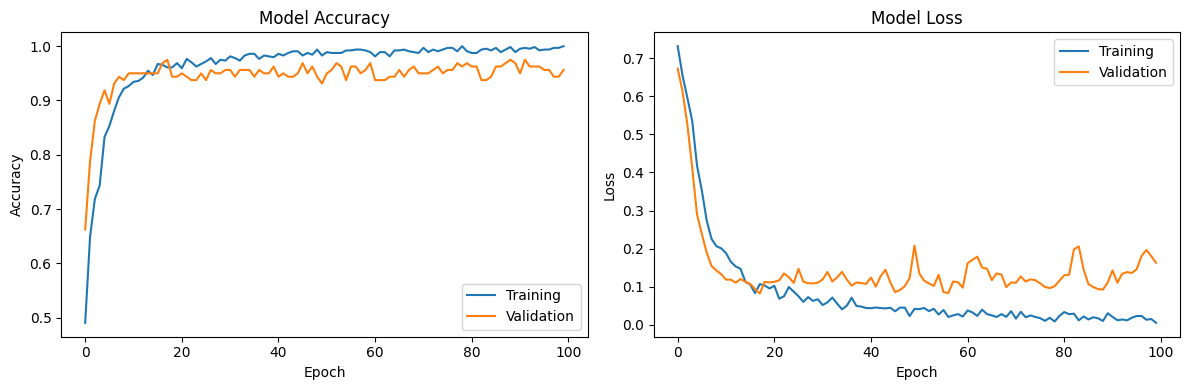

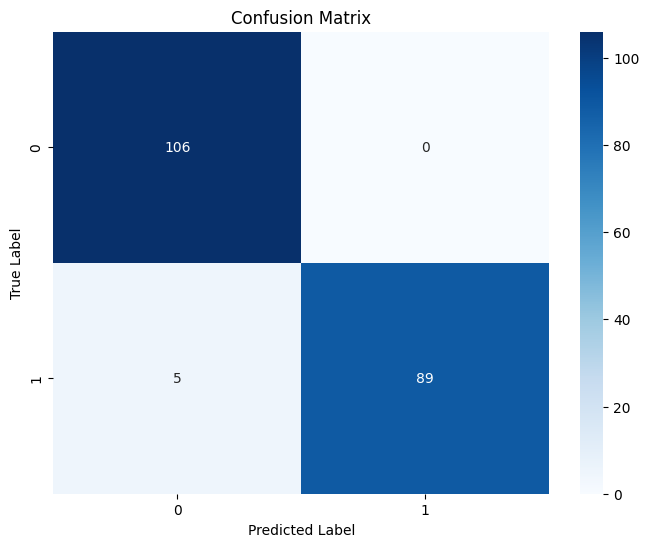

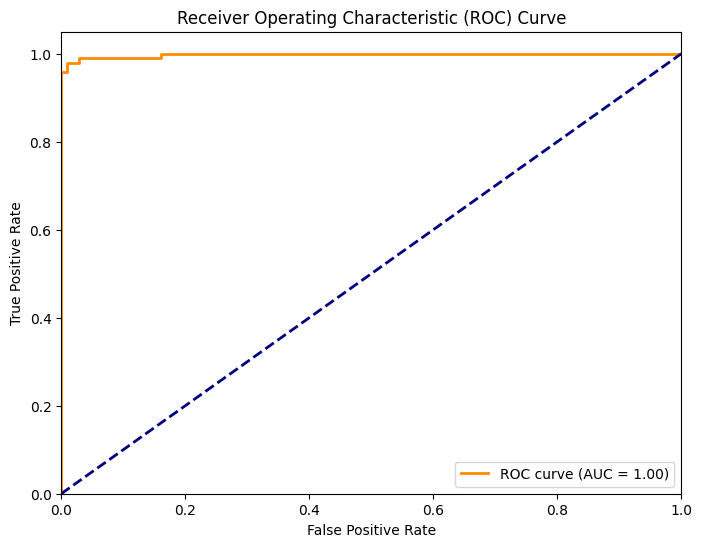

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0695  

Test accuracy: 0.975
Test loss: 0.112


In [6]:
# Ejemplo de uso con datos sintéticos
def main():
    # Generar datos sintéticos para ejemplo
    np.random.seed(42)
    X = np.random.randn(1000, 10)  # 1000 muestras con 10 características
    y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Clasificación binaria simple
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42)
    
    # Escalar datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Crear y entrenar modelo
    model, history = create_and_train_model(X_train, X_test, y_train, y_test)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
     # Graficar resultados
    plot_training_history(history)
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred)
    
    # Evaluar modelo
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {accuracy:.3f}")
    print(f"Test loss: {loss:.3f}")

if __name__ == "__main__":
    main()

##### ***Manera 2***

In [7]:
# Importamos bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_classification

In [8]:
# Generar datos simulados
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, n_classes=2, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Crear el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/50


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6320 - loss: 0.6286 - val_accuracy: 0.7250 - val_loss: 0.5509
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7389 - loss: 0.5334 - val_accuracy: 0.7937 - val_loss: 0.4733
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8116 - loss: 0.4508 - val_accuracy: 0.8250 - val_loss: 0.4023
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8843 - loss: 0.3576 - val_accuracy: 0.8750 - val_loss: 0.3335
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9101 - loss: 0.2719 - val_accuracy: 0.9062 - val_loss: 0.2736
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.2160 - val_accuracy: 0.9000 - val_loss: 0.2446
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9476 - loss: 0.1570 - val_accuracy: 0.9250 - val_loss: 0.2112
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1413 - val_accuracy: 0.9312 - val_loss: 0.2149

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


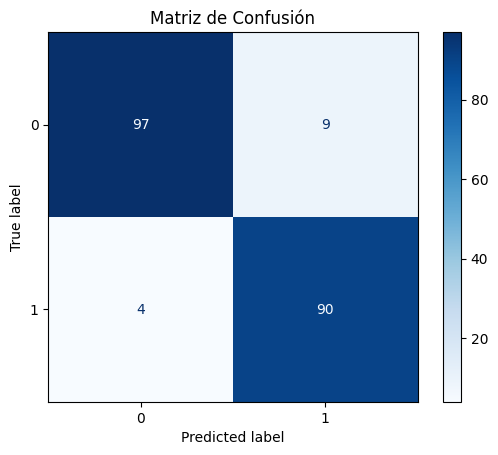

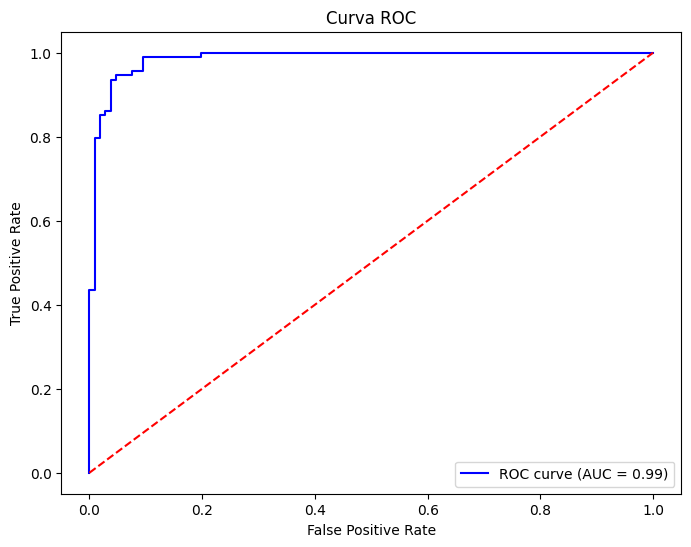

In [10]:
# Predicciones
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


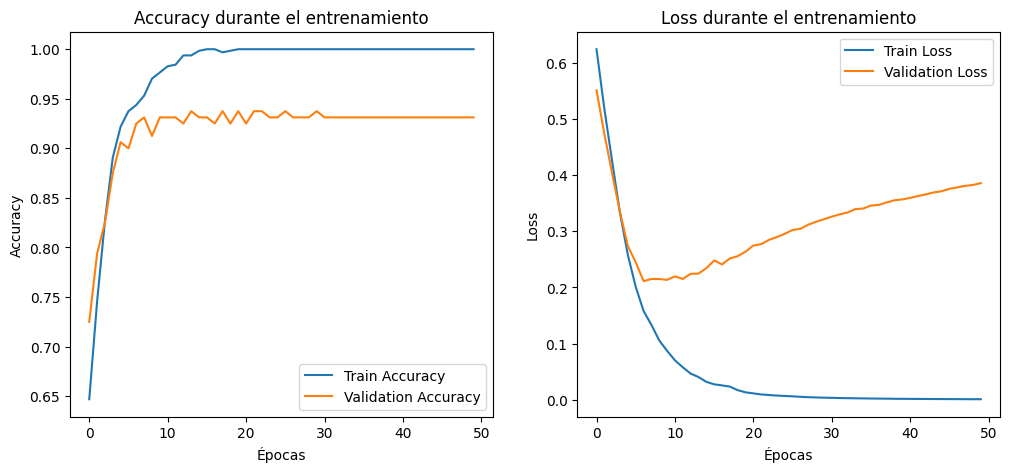

In [11]:
# Accuracy y Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()
